NAME:HAJARE SHRUTI EKNATH

TASK:4
**E-MAIL SPAM DETECTION WITH MACHINE LEARNING**

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

**Data Loading**

In [4]:
df=pd.read_csv('/E-mail Spam.zip', encoding='latin-1')

In [5]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


**EDA**

**1. Handling Null Values**

In [8]:
df.isna().any()

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [9]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

**2.Handling Duplicate Values**

In [10]:
df['v2'].nunique()

5169

In [11]:
df.shape

(5572, 5)

In [12]:
df['v2'].drop_duplicates(inplace=True)

In [13]:
df.shape

(5572, 5)

In [14]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


**3.Class Distributions**

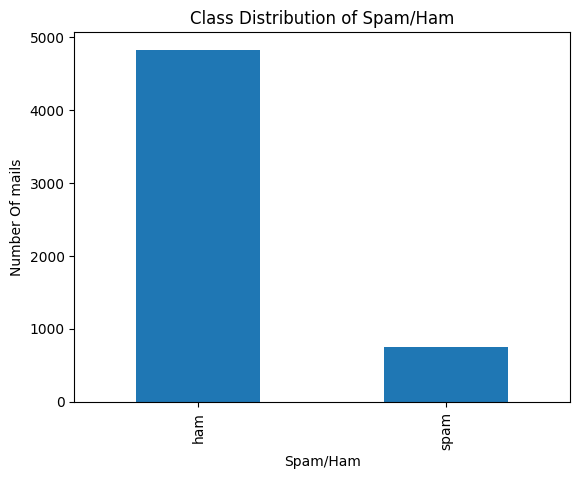

In [15]:
#creat a bar plot of the class distribution
class_counts =df['v1'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number Of mails')
plt.show()

**Word Count**

In [16]:
from collections import Counter
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
#concatenate all tweet texts into a single string
all_text=''.join(df['v2'].values)
#remove URLs, mentions and hashtags from the text
all_text=re.sub(r'http\s+','', all_text)
all_text=re.sub(r'@\s+','', all_text)
all_text=re.sub(r'#\s+','', all_text)

In [18]:
#split the text into individual words
words=all_text.split()

In [19]:
#Remove stop words
stop_words=set(stopwords.words('english'))
words=[word for word in words if not word in stop_words]

In [20]:
#count the frequency of each word
word_counts=Counter(words)
top_words=word_counts.most_common(100)
top_words

[('I', 1083),
 ('u', 683),
 ('2', 447),
 ('call', 364),
 ('get', 325),
 ('ur', 293),
 ('&lt;#&gt;', 257),
 ('4', 247),
 ('U', 236),
 ('go', 233),
 ('like', 219),
 ('know', 218),
 ('.', 216),
 ('got', 203),
 ('come', 195),
 ("I'm", 183),
 ('want', 154),
 ('send', 149),
 ('time', 148),
 ('You', 145),
 ('?', 144),
 ('Call', 141),
 ('going', 141),
 ('need', 141),
 ('...', 141),
 ('n', 136),
 ('still', 134),
 ('one', 129),
 ('text', 124),
 ("I'll", 121),
 ('think', 113),
 ('good', 113),
 ('r', 112),
 ('But', 111),
 ('see', 110),
 ('love', 109),
 ('back', 107),
 ('&', 107),
 ('Ì_', 104),
 ('tell', 104),
 ('take', 100),
 ('home', 99),
 ('If', 99),
 ('dont', 96),
 ('mobile', 93),
 ('free', 93),
 ("i'm", 91),
 ('make', 89),
 ('new', 89),
 ('day', 89),
 ('-', 87),
 ('give', 87),
 ('&amp;', 82),
 ('We', 82),
 ('phone', 82),
 ('much', 81),
 ('ask', 80),
 ('How', 80),
 ('Your', 80),
 ('Just', 79),
 ('To', 76),
 ('And', 75),
 ('txt', 74),
 ('A', 74),
 ('So', 74),
 ('claim', 73),
 ('FREE', 73),
 ('gr

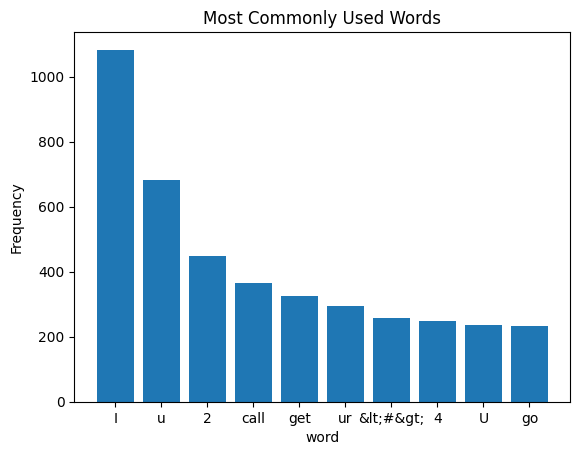

In [21]:
#creat a bar chart of the most common words
top_words=word_counts.most_common(10)
x_values=[word[0] for word in top_words]
y_values=[word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

In [22]:
# clean the data
def clean_text(text):
  #remove HTML tags
  text=re.sub('[<.*?>]','',text)
  #remove non-alphabetic characters and convert to lowercase
  text=re.sub('[^a-zA-z]','',text).lower()
  #tokenize the text
  words=nltk.word_tokenize(text)
  #remove stopwords
  words=[w for w in words if w not in stopwords.words('english')]
  # stem the words
  stemmer=PorterStemmer()
  words=[stemmer.stem(w) for w in words]
  #join the words back into a string
  text=''.join(words)
  return text


In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
%%time
tqdm.pandas()
df['cleaned_text']=df['v2'].progress_apply(clean_text)

  0%|          | 0/5572 [00:00<?, ?it/s]

CPU times: user 1.11 s, sys: 83.4 ms, total: 1.19 s
Wall time: 1.22 s


2.Feature Extraction

In [25]:
#creat the bag of words model
cv=CountVectorizer(max_features=5000)
x=cv.fit_transform(df['cleaned_text']).toarray()
y=df['v1']

In [26]:
#split the data into training and sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Classification Model

1.Logistic Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#train a logistic regression model
clf=LogisticRegression()

In [28]:
clf.fit(x_train,y_train)

LogisticRegression()

2.Predictions

In [29]:
#evaluate the classifier on the test set
y_pred=clf.predict(x_test)

In [30]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

3.Accuracy

In [31]:
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.8699551569506726


4.Confusion Matrix

<Axes: >

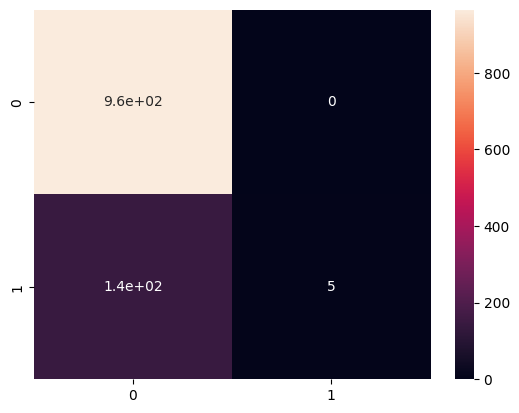

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

import seaborn as sns
sns.heatmap(cm,annot=True)